## **Instal packages & data path**

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
!pip install scienceplots

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
plt.style.use(['science','no-latex'])
plt.rcParams["figure.figsize"] = (6, 5)
sns.color_palette("muted")

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [122]:
import pandas as pd
import numpy as np
import re
import ast
import os
import glob

In [123]:
folder_path = "/content/drive/MyDrive/Theses/patent_chunks"

## **Loading data & Text cleaning**

In [124]:
# text cleaning function
def clean_text(text):
    try:
        data = ast.literal_eval(text)
        if isinstance(data, dict) and "Texts" in data:
            for item in data["Texts"]:
                if item.get("lang") == "en":
                    clean_text = item.get("text", "").strip()
                    clean_text = re.sub(r"<[^>]+>", " ", clean_text)
                    clean_text = re.sub(r"\s+", " ", clean_text).strip()
                    clean_text = clean_text.lower()
                    clean_text = re.sub(r"[^a-z\s.,;:!?()\"'-]", "", clean_text)
                    clean_text = re.sub(r"(\s*[.,;:!?()\"'-]\s*){2,}", r" \1", clean_text)
                    return clean_text
    except (ValueError, SyntaxError):
        pass
    return text

In [125]:
dataframes = []
file_paths = glob.glob(os.path.join(folder_path, "patent_chunk_*.csv"))

# File loop
for file_path in file_paths:
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)

        df["Titles"] = df["Titles"].apply(clean_text)
        df["Abstracts"] = df["Abstracts"].apply(clean_text)
        df["Claims"] = df["Claims"].apply(clean_text)

        df = df.drop(columns=["Descriptions"], errors='ignore')
        df = df.drop(columns=["LegalStatus"], errors='ignore')
        df = df.dropna()
        df = df.drop_duplicates()

        dataframes.append(df)

final_df = pd.concat(dataframes, ignore_index=True)

final_df.head()

,CountryCode,ApplicationNumber,Titles,Abstracts,Claims,IPCs,CPCs,ProbablePatentAssignee,EarliestPriorityDate
0,US,US20170853637,systems and methods for generating interactive...,systems and methods are provided for generatin...,. a computerized system for generating hyperme...,"['G06F16/30', 'G06F16/93', 'G06F21/62', 'G06F3...","['G06F16/94', 'G06F21/6245', 'G06F3/048', 'G06...",TELETRACKING TECHNOLOGIES INC,20161223
1,US,US20200843969,systems and methods for generating interactive...,systems and methods are provided for generatin...,. a mobile device comprising: at least one sto...,"['G06F16/00', 'G06F16/93', 'G06F21/62', 'G06F3...","['G06F16/94', 'G06F21/6245', 'G06F3/048', 'G06...",TELETRACKING TECHNOLOGIES INC,20161223
2,US,US20210477824,systems and methods for generating hypermedia-...,systems and methods are provided for generatin...,. a method for providing hypermedia elements t...,"['G06F16/30', 'G06F16/93', 'G06F21/62', 'G06F3...","['G06F16/94', 'G06F21/6245', 'G06F3/048', 'G06...",TELETRACKING TECHNOLOGIES INC,20161223
3,US,US20230300035,systems and methods for generating hypermedia-...,systems and methods are provided for generatin...,. a method for providing hypermedia elements t...,"['G06F16/90', 'G06F16/93', 'G06F21/62', 'G06F3...","['G06F16/94', 'G06F21/6245', 'G06F3/048', 'G06...",TELETRACKING TECHNOLOGIES INC,20161223
4,US,US20170853637,systems and methods for generating interactive...,systems and methods are provided for generatin...,. a computerized system for generating hyperm...,"['G06F17/30', 'G06F21/62', 'G06F3/048', 'G16H1...","['G06F16/94', 'G06F21/6245', 'G06F3/048', 'G06...",TELETRACKING TECHNOLOGIES INC,20161223


In [126]:
print(final_df.describe())
print(final_df.info())

       EarliestPriorityDate
count          7.723400e+04
mean           2.018081e+07
std            2.118153e+04
min            2.015010e+07
25%            2.016100e+07
50%            2.018052e+07
75%            2.020012e+07
max            2.024083e+07
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77234 entries, 0 to 77233
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CountryCode             77234 non-null  object
 1   ApplicationNumber       77234 non-null  object
 2   Titles                  77234 non-null  object
 3   Abstracts               77234 non-null  object
 4   Claims                  77234 non-null  object
 5   IPCs                    77234 non-null  object
 6   CPCs                    77234 non-null  object
 7   ProbablePatentAssignee  77234 non-null  object
 8   EarliestPriorityDate    77234 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 5.3+ MB
None


In [127]:
#Date Convert
final_df['EarliestPriorityDate'] = final_df['EarliestPriorityDate'].astype(int)
final_df['EarliestPriorityDate'] = pd.to_datetime(final_df['EarliestPriorityDate'].astype(str), format='%Y%m%d')

In [128]:
unique_CountryCode = final_df['CountryCode'].unique()
print(unique_CountryCode)

['US']


In [129]:
 #removing country code
 final_df = final_df.drop(columns=["CountryCode"], errors='ignore')

In [130]:
print(f"Number of unique Application no's: {len(final_df.ApplicationNumber.unique())}")
print(f"Number of unique Abstracts: {len(final_df.Abstracts.unique())}")
print(f"Number of unique Claims: {len(final_df.Claims.unique())}")

Number of unique Application no's: 51969
Number of unique Abstracts: 43470
Number of unique Claims: 76451


In [131]:
# calc length of text to analyze and use for removing duplicates keeping the longer claim
final_df["claim_length"] = final_df.Claims.apply(lambda x: len(x.split(" ")))
final_df["abstract_length"] = final_df.Abstracts.apply(lambda x: len(x.split(" ")))

In [132]:
final_df.head()

,ApplicationNumber,Titles,Abstracts,Claims,IPCs,CPCs,ProbablePatentAssignee,EarliestPriorityDate,claim_length,abstract_length
0,US20170853637,systems and methods for generating interactive...,systems and methods are provided for generatin...,. a computerized system for generating hyperme...,"['G06F16/30', 'G06F16/93', 'G06F21/62', 'G06F3...","['G06F16/94', 'G06F21/6245', 'G06F3/048', 'G06...",TELETRACKING TECHNOLOGIES INC,2016-12-23,1590,139
1,US20200843969,systems and methods for generating interactive...,systems and methods are provided for generatin...,. a mobile device comprising: at least one sto...,"['G06F16/00', 'G06F16/93', 'G06F21/62', 'G06F3...","['G06F16/94', 'G06F21/6245', 'G06F3/048', 'G06...",TELETRACKING TECHNOLOGIES INC,2016-12-23,1198,139
2,US20210477824,systems and methods for generating hypermedia-...,systems and methods are provided for generatin...,. a method for providing hypermedia elements t...,"['G06F16/30', 'G06F16/93', 'G06F21/62', 'G06F3...","['G06F16/94', 'G06F21/6245', 'G06F3/048', 'G06...",TELETRACKING TECHNOLOGIES INC,2016-12-23,1140,139
3,US20230300035,systems and methods for generating hypermedia-...,systems and methods are provided for generatin...,. a method for providing hypermedia elements t...,"['G06F16/90', 'G06F16/93', 'G06F21/62', 'G06F3...","['G06F16/94', 'G06F21/6245', 'G06F3/048', 'G06...",TELETRACKING TECHNOLOGIES INC,2016-12-23,1401,148
4,US20170853637,systems and methods for generating interactive...,systems and methods are provided for generatin...,. a computerized system for generating hyperm...,"['G06F17/30', 'G06F21/62', 'G06F3/048', 'G16H1...","['G06F16/94', 'G06F21/6245', 'G06F3/048', 'G06...",TELETRACKING TECHNOLOGIES INC,2016-12-23,1362,139


In [133]:
ApplicationNumber_counts = final_df['ApplicationNumber'].value_counts()
repeating_ApplicationNumber = ApplicationNumber_counts[ApplicationNumber_counts > 1].index
repeating = final_df[final_df['ApplicationNumber'].isin(repeating_ApplicationNumber)]
print(repeating)

      ApplicationNumber                                             Titles  \
0         US20170853637  systems and methods for generating interactive...   
1         US20200843969  systems and methods for generating interactive...   
4         US20170853637  systems and methods for generating interactive...   
5         US20200843969  systems and methods for generating interactive...   
6         US20220662328  ultrasound diagnostic apparatus, control metho...   
...                 ...                                                ...   
77225     US20210147599  system and method for monitoring offset during...   
77226     US20210147599  system and method for monitoring offset during...   
77228     US20170691087  robotic device with compact joint design and a...   
77229     US20170691087  robotic device with compact joint design and a...   
77232     US20220919593  follow-up form management method applied to he...   

                                               Abstracts  \
0  

In [134]:
print(f"Number of unique Application no's: {len(final_df.ApplicationNumber.unique())}")
print(f"Number of unique Abstracts: {len(final_df.Abstracts.unique())}")
print(f"Number of unique Claims: {len(final_df.Claims.unique())}")

Number of unique Application no's: 51969
Number of unique Abstracts: 43470
Number of unique Claims: 76451


In [135]:
final_df = final_df.sort_values(by="claim_length", ascending=False)
final_df = final_df.drop_duplicates(subset="ApplicationNumber", keep="first")
final_df = final_df.drop_duplicates(subset="Claims", keep="first")

In [136]:
print(f"Number of unique Application no's: {len(final_df.ApplicationNumber.unique())}")
print(f"Number of unique Abstracts: {len(final_df.Abstracts.unique())}")
print(f"Number of unique Claims: {len(final_df.Claims.unique())}")

Number of unique Application no's: 51626
Number of unique Abstracts: 42260
Number of unique Claims: 51626


In [137]:
print(f"Avg. number of words in Claims: {np.mean(final_df.claim_length):.2f}")
print(f"Avg. number of words in Abstracts: {np.mean(final_df.abstract_length):.2f}")
print(f"Total number of words in Claims: {final_df.claim_length.sum()}")
print(f"Total number of words in Abstracts: {final_df.abstract_length.sum()}")

Avg. number of words in Claims: 1169.93
Avg. number of words in Abstracts: 113.38
Total number of words in Claims: 60398603
Total number of words in Abstracts: 5853327


In [138]:
#sample inspection of claim length and content
sample = final_df.loc[1,'Claims']
sample

'. a mobile device comprising: at least one storage device storing a set of instructions; and at least one processor coupled to the at least one storage device, the set of instructions configuring the at least one processor to: transmit a request for information about an individual; receive a hypermedia element comprising an authentication form; transmit authentication information captured through the authentication form; receive instructions to display a first graphical user interface, the first graphical user interface comprising a hypermedia icon comprising an avatar, a hypermedia element comprising current status data, and a hypermedia element comprising available actions; transmit a request for a location of the individual, the request for the location of the individual comprising a mobile device location; receive a message indicating that a relative of the individual is undergoing a procedure; and after receiving the message, receive instructions to display a second graphical use

In [139]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51626 entries, 62878 to 37700
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ApplicationNumber       51626 non-null  object        
 1   Titles                  51626 non-null  object        
 2   Abstracts               51626 non-null  object        
 3   Claims                  51626 non-null  object        
 4   IPCs                    51626 non-null  object        
 5   CPCs                    51626 non-null  object        
 6   ProbablePatentAssignee  51626 non-null  object        
 7   EarliestPriorityDate    51626 non-null  datetime64[ns]
 8   claim_length            51626 non-null  int64         
 9   abstract_length         51626 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 6.3+ MB


## **EDA**

**Word distribution analysi**s

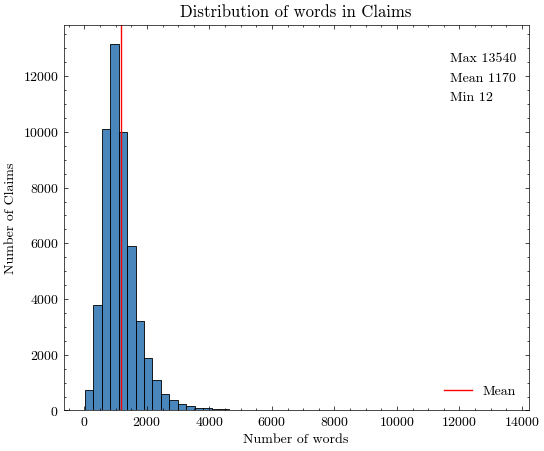

In [155]:
sns.histplot(final_df.claim_length, bins = 50)
plt.axvline(np.mean(final_df.claim_length), color = "r",label = "Mean")
plt.text(11700, 12500, f"Max {max(final_df.claim_length)}")
plt.text(11700, 11100, f"Min {min(final_df.claim_length)}")
plt.text(11700, 11800, f"Mean {np.mean(final_df.claim_length):.0f}")
plt.title("Distribution of words in Claims")
plt.xlabel("Number of words")
plt.ylabel("Number of Claims")
plt.legend()
plt.show()

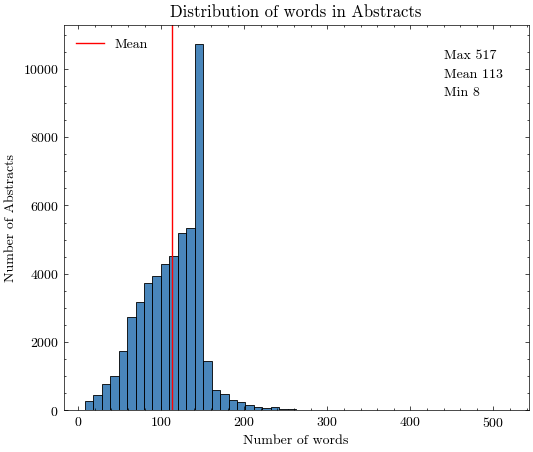

In [141]:
sns.histplot(final_df.abstract_length, bins = 50)
plt.axvline(np.mean(final_df.abstract_length), color = "r", label = "Mean")
plt.text(440, 10300, f"Max {max(final_df.abstract_length)}")
plt.text(440, 9200, f"Min {min(final_df.abstract_length)}")
plt.text(440, 9750, f"Mean {np.mean(final_df.abstract_length):.0f}")
plt.title("Distribution of words in Abstracts")
plt.xlabel("Number of words")
plt.ylabel("Number of Abstracts")
plt.legend()
plt.show()

**Patent filings analysis Patentee + year**

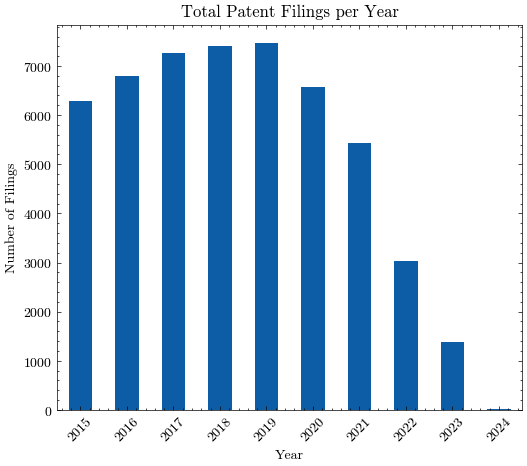

In [142]:
# Distribution if fillings per year
final_df['Year'] = final_df['EarliestPriorityDate'].dt.year
total_filings_per_year = final_df.groupby('Year')['ApplicationNumber'].count()

total_filings_per_year.plot(kind='bar')
plt.title('Total Patent Filings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Filings')
plt.xticks(rotation=45)
plt.show()

In [143]:
company_patent_counts = final_df.groupby('ProbablePatentAssignee')['ApplicationNumber'].count().reset_index()
sorted_companies = company_patent_counts.sort_values(by='ApplicationNumber', ascending=False)
top_50_companies = sorted_companies.head(50)

top_50_companies.rename(columns={'ApplicationNumber': 'No of applications'}, inplace=True)

print(top_50_companies)

                                 ProbablePatentAssignee  No of applications
6003                                       OLYMPUS CORP                2053
2963                             FUJIFILM HOLDINGS CORP                1524
1706                                     CILAG GMBH INT                1453
6407                                PHILIPS KONINKLL NV                1392
1938                                        COVIDIEN LP                1334
1402                                          CANON INC                 990
1098                        BIOSENSE WEBSTER ISRAEL LTD                 835
4005                  INTUITIVE SURGICAL OPERATIONS INC                 794
1226                       BOSTON SCIENTIFIC SCIMED INC                 689
7456                            SIEMENS HEALTHINEERS AG                 479
744                                    AURIS HEALTH INC                 378
5138                                      MEDTRONIC INC                 357
3059        

<ipython-input-143-2617e6ab083f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_companies.rename(columns={'ApplicationNumber': 'No of applications'}, inplace=True)


**Classifications codes analysis**

---



In [144]:
def split_codes(df, col_name):
    # Split the codes by delimiter and explode into separate rows
    exploded_df = df[col_name].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
    exploded_df = exploded_df.str.replace(r"[\[\]']", "", regex=True)
    return exploded_df.to_frame(name=col_name)

# Create new DataFrames for IPC and CPC codes
ipc_df = split_codes(final_df, 'IPCs')
cpc_df = split_codes(final_df, 'CPCs')

# Display the exploded DataFrames
print("\nExploded IPC DataFrame:")
print(ipc_df)

print("\nExploded CPC DataFrame:")
print(cpc_df)



Exploded IPC DataFrame:
              IPCs
62878    A61B34/10
62878    A61B34/20
32670  A61K31/7105
32670    A61M31/00
32670    C12N15/11
...            ...
57347    G06Q10/10
57347    G16H40/20
37700    A61B34/20
37700    A61B34/30
37700    A61B50/13

[246127 rows x 1 columns]

Exploded CPC DataFrame:
                 CPCs
62878    A61B2034/107
62878   A61B2034/2051
62878   A61B2034/2055
62878   A61B2034/2059
62878   A61B2034/2061
...               ...
37700       A61B34/20
37700       A61B34/30
37700       A61B50/13
37700    A61M2209/084
37700    A61M2209/086

[812654 rows x 1 columns]


In [145]:
ipc_category_counts = ipc_df['IPCs'].value_counts()
cpc_category_counts = cpc_df['CPCs'].value_counts()

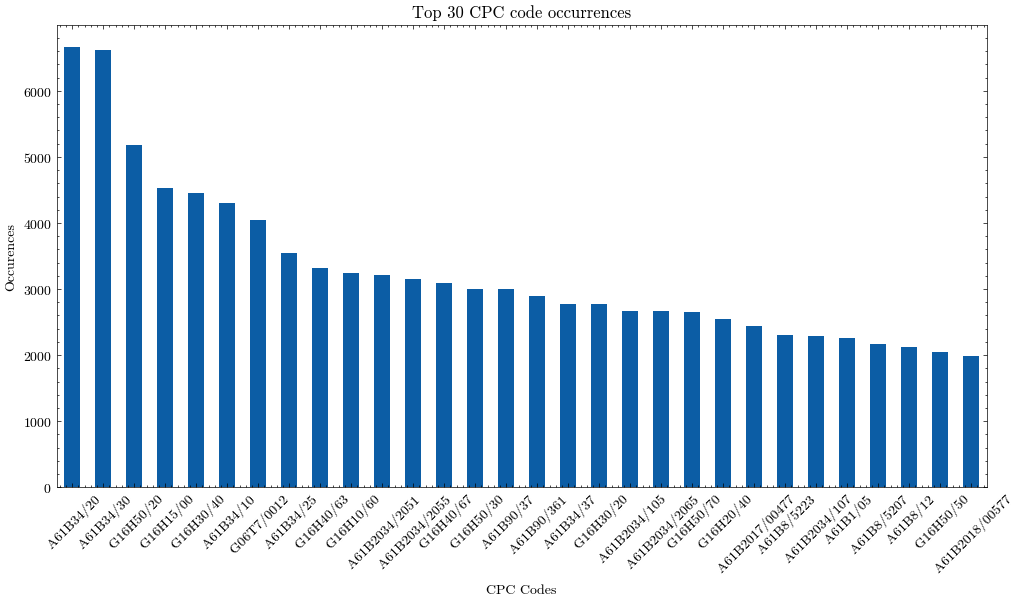

In [146]:
plot = cpc_category_counts.nlargest(30).plot(kind='bar', figsize=(12, 6))
plt.title('Top 30 CPC code occurrences')
plt.xlabel('CPC Codes')
plt.ylabel('Occurences')
plt.xticks(rotation=45)
plt.show()

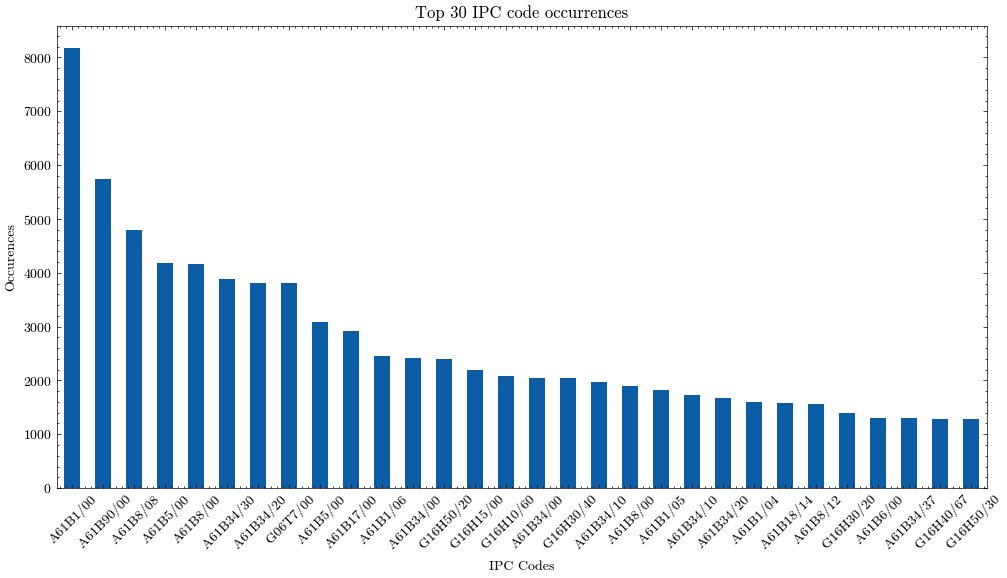

In [147]:
plot = ipc_category_counts.nlargest(30).plot(kind='bar', figsize=(12, 6))
plt.title('Top 30 IPC code occurrences')
plt.xlabel('IPC Codes')
plt.ylabel('Occurences')
plt.xticks(rotation=45)
plt.show()

In [148]:
final_df.to_csv('/content/drive/MyDrive/Theses/final_patent_text.csv', index=False)

In [149]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51626 entries, 62878 to 37700
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ApplicationNumber       51626 non-null  object        
 1   Titles                  51626 non-null  object        
 2   Abstracts               51626 non-null  object        
 3   Claims                  51626 non-null  object        
 4   IPCs                    51626 non-null  object        
 5   CPCs                    51626 non-null  object        
 6   ProbablePatentAssignee  51626 non-null  object        
 7   EarliestPriorityDate    51626 non-null  datetime64[ns]
 8   claim_length            51626 non-null  int64         
 9   abstract_length         51626 non-null  int64         
 10  Year                    51626 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(7)
memory usage: 6.5+ MB
